In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import time
import collections
import random
import timeit
import math

import scipy,sklearn,pylab
from scipy import io,misc

from sklearn import model_selection,covariance
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction import DictVectorizer

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['figure.figsize'] = (6,4)

In [2]:
mnist = scipy.io.loadmat("hw7_data/mnist_data/images",
                         mat_dtype=True)
face = scipy.misc.imread("hw7_data/low-rank_data/face.jpg")
sky= scipy.misc.imread("hw7_data/low-rank_data/sky.jpg")
joke = scipy.io.loadmat("hw7_data/joke_data/joke_train")


In [3]:
jokeval = np.genfromtxt("hw7_data/joke_data/validation.txt",
                        delimiter = ',',dtype=int)
jokeque = np.genfromtxt("hw7_data/joke_data/query.txt",
                        delimiter = ',',dtype=int)

In [144]:
def lloyd(k,data):
    i = np.arange(data.shape[0])
    index  = np.arange(data.shape[0])%k
    np.random.shuffle(index)
    means=[data[index==l][
        np.random.choice(data.shape[0])//k] for l in range(k)]
    dist = np.inf*np.ones(data.shape[0])
    #print(dist.shape)
    newind=index
    for l in range(k):
        diff = data - means[l]
        newdist = np.array(np.linalg.norm(diff,axis=1))
        #print(newdist.shape)
        #print(dist)
        #print(newdist)
        #print(l)
        newind[(newdist<dist)]= l
        #print(newind.shape)      
        dist[newdist<dist] = newdist[newdist<dist]                    
    #print(index)
    #print(newind)
    
    #newind[(dists[newind[i],i]==dists[index[i],i])]= index[(dists[newind[i],i]==dists[index[i],i])]
        #print(newind)
        
    index= newind
    j=0
    while j<100:
        #indices = np.array_split(index,k)
        
        means = [np.mean(
            data[index==l],axis=0) for l in range(k)]
        for l in range(k):
            #mean = np.mean(data[index==l],axis=0)
            diff =data - means[l]
            newdist = np.linalg.norm(diff,axis=1)
            newind[(newdist<dist)]= l
            dist[newdist<dist]= newdist[newdist<dist]
            #newind = np.argmin(dists,axis =0)
        #print(index)
        #print(newind)
        #newind[(dists[newind[i],i]==dists[index[i],i])]= index[(dists[newind[i],i]==dists[index[i],i])]
        #print(newind)
    
        #print(dists)
        if (newind==index).all():
            print('done')
            break
        print(np.count_nonzero(newind-index))
        index= newind
        j+=1
    return newind,means



In [145]:
mnist_fix = np.moveaxis(
    mnist['images'],2,0).reshape(60000,784)

In [146]:
groups,cluster_mean = lloyd(5,mnist_fix)

done


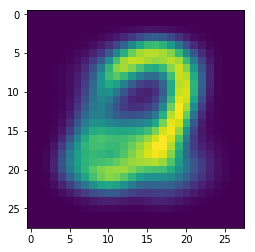

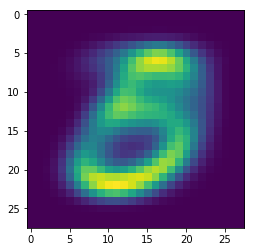

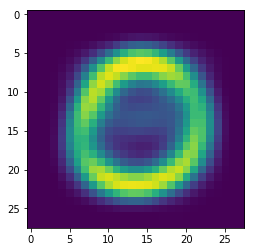

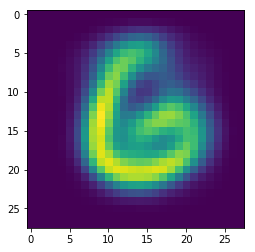

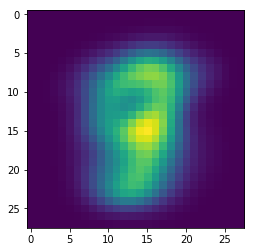

In [150]:
for i in range(5):
    plt.imshow(cluster_mean[i].reshape(28,28))
    plt.show()

In [151]:
groups10,cluster_mean10 = lloyd(10,mnist_fix)

done


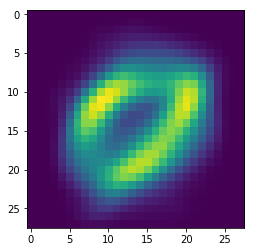

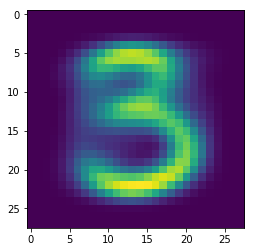

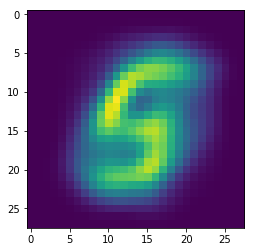

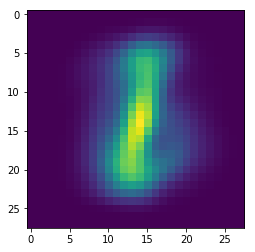

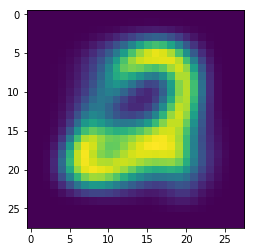

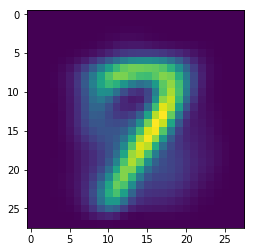

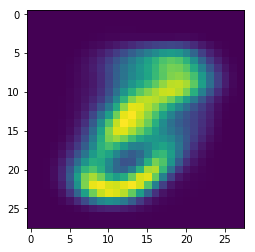

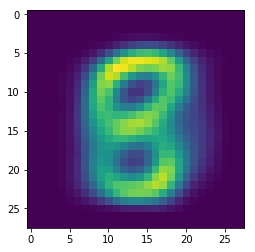

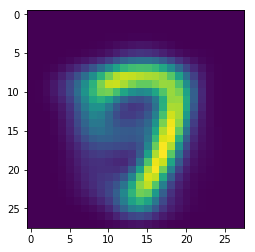

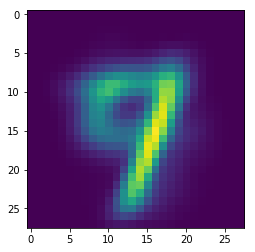

In [152]:
for i in range(10):
    plt.imshow(cluster_mean10[i].reshape(28,28))
    plt.show()

In [153]:
groups20,cluster_mean20 = lloyd(20,mnist_fix)

done


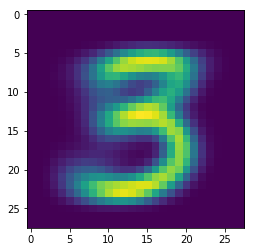

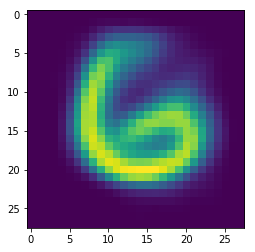

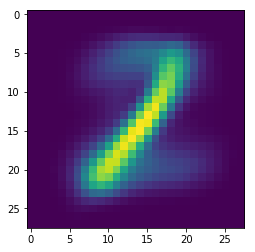

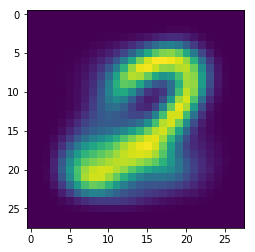

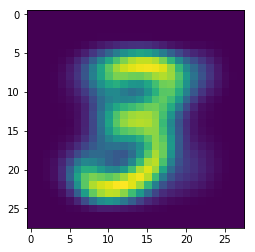

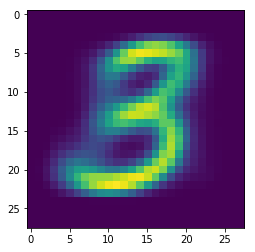

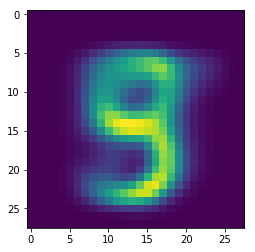

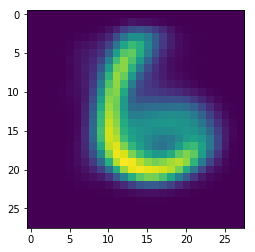

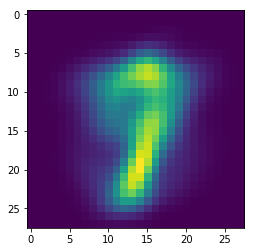

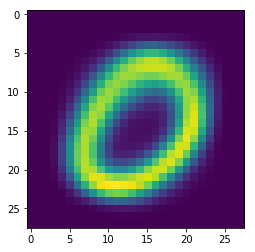

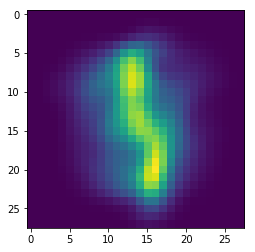

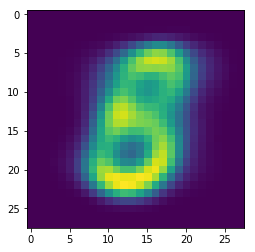

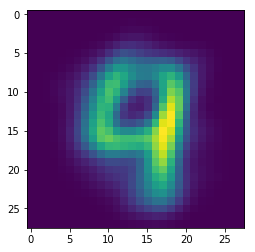

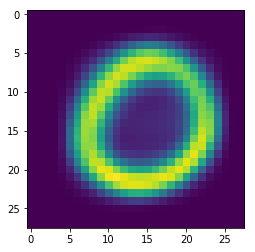

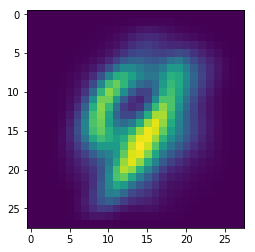

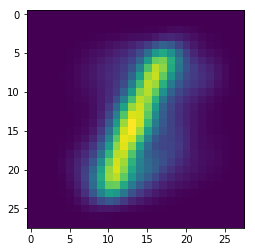

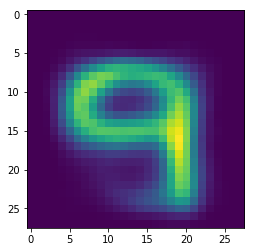

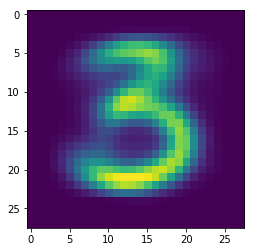

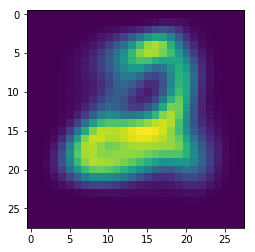

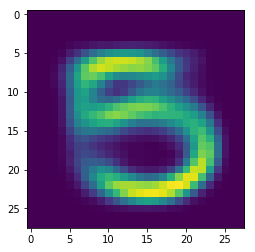

In [154]:
for i in range(20):
    plt.imshow(cluster_mean20[i].reshape(28,28))
    plt.show()

In [247]:
u,s,v =np.linalg.svd(face,full_matrices=False)

In [248]:
S5=np.zeros((280,280))
S20 = np.zeros((280,280))
S100=np.zeros((280,280))
S5[:5,:5]=np.diag(s)[:5,:5]
S20[:20,:20]=np.diag(s)[:20,:20]
S100[:100,:100]=np.diag(s)[:100,:100]

R5=u.dot(S5.dot(v))
R20 = u.dot(S20.dot(v))
R100 = u.dot(S100.dot(v))

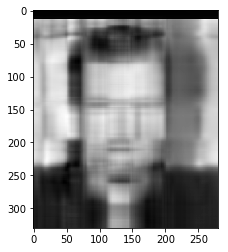

In [227]:
plt.imshow(R5,cmap='gray')
plt.show()

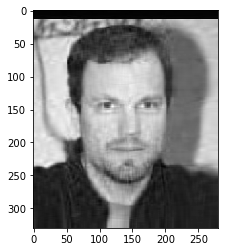

In [228]:
plt.imshow(R20,cmap='gray')
plt.show()

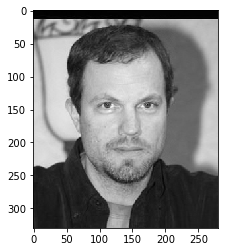

In [229]:
plt.imshow(R100,cmap='gray')
plt.show()

In [234]:
x = np.arange(100)

In [235]:
y = np.zeros(100)
for i in x:
    S=np.zeros((280,280))
    S[:i,:i]=np.diag(s)[:i,:i]
    y[i] = (np.linalg.norm(
        face-u.dot(S.dot(v)))**2)/(330*280)

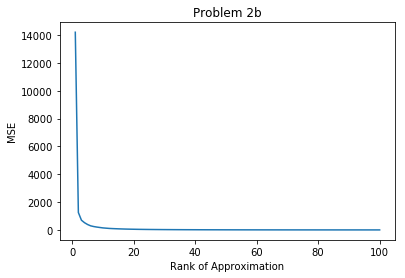

In [236]:
plt.plot(x+1,y)
plt.title('Problem 2b')
plt.ylabel("MSE")
plt.xlabel("Rank of Approximation")
plt.show()

In [244]:
u2,s2,v2 =np.linalg.svd(sky,full_matrices=False)

In [245]:
S5=np.zeros((280,280))
S20 = np.zeros((280,280))
S100=np.zeros((280,280))
S5[:5,:5]=np.diag(s2)[:5,:5]
S20[:20,:20]=np.diag(s2)[:20,:20]
S100[:100,:100]=np.diag(s2)[:100,:100]

R5=u2.dot(S5.dot(v2))
R20 = u2.dot(S20.dot(v2))
R100 = u2.dot(S100.dot(v2))

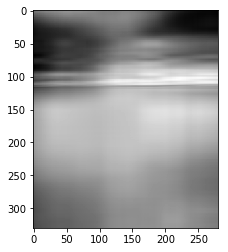

In [246]:
plt.imshow(R5,cmap='gray')
plt.show()

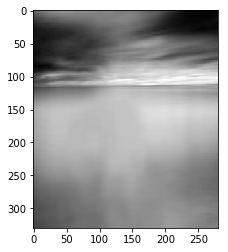

In [242]:
plt.imshow(R20,cmap='gray')
plt.show()

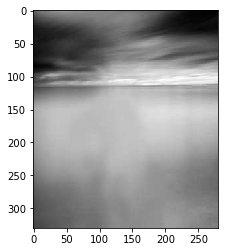

In [243]:
plt.imshow(R100,cmap='gray')
plt.show()

In [272]:
S2=np.zeros((280,280))
S3 = np.zeros((280,280))
S2[:65,:65]=np.diag(s)[:65,:65]
S3[:15,:15]=np.diag(s2)[:15,:15]

R2=u.dot(S2.dot(v))
R3 = u2.dot(S3.dot(v2))

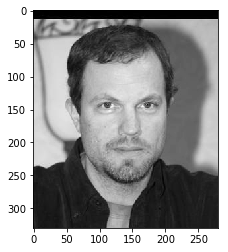

In [273]:
plt.imshow(face,cmap='gray')
plt.show()

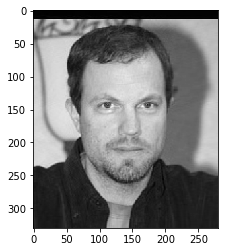

In [274]:
plt.imshow(R2,cmap='gray')
plt.show()

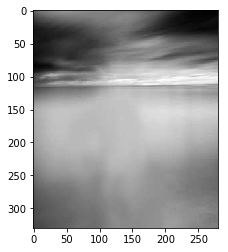

In [270]:
plt.imshow(sky,cmap='gray')
plt.show()

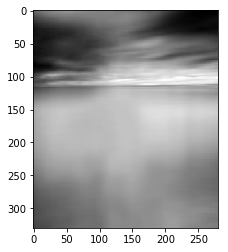

In [271]:
plt.imshow(R3,cmap='gray')
plt.show()

In [4]:
joke_fix = np.nan_to_num(joke['train'])

In [155]:
jokeu, jokes, jokev = np.linalg.svd(
    joke_fix,full_matrices=False)

In [156]:
users = jokeu.dot(np.sqrt(np.diag(jokes)))
jokevec = np.sqrt(np.diag(jokes)).dot(jokev).T

In [157]:
users.shape

(24983, 100)

In [158]:
jokevec.shape

(100, 100)

In [172]:
users = jokeu[:,0:10].dot(np.sqrt(np.diag(jokes[0:10])))
jokevec = np.sqrt(np.diag(jokes[0:10])).dot(jokev[0:10]).T

In [159]:
y = []
jokepred = []
for i in [2,5,10,20]:
    jokeS=np.zeros((100,100))
    jokeS[:i,:i]=np.diag(jokes)[:i,:i]
    jore = jokeu.dot(jokeS.dot(jokev))
    jokepred.append(jore)
    y.append(((jore-joke['train'])[
        np.logical_not(np.isnan(joke['train']))]**2).sum())

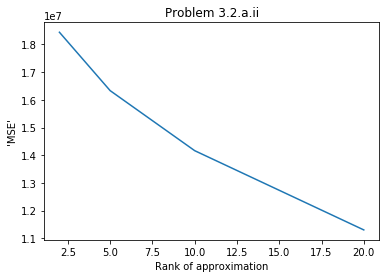

In [170]:
plt.plot([2,5,10,20],y)
plt.title('Problem 3.2.a.ii')
plt.ylabel("'MSE'")
plt.xlabel("Rank of approximation")
plt.show()

In [169]:
y

[18441623.017881587,
 16333384.420196818,
 14165432.757999644,
 11304007.439729331]

In [165]:
for i in range(4):
    print([2,5,10,20][i],1-(np.count_nonzero(
        jokeval[:,2]-(jokepred[i][jokeval[:,0]-1,jokeval[:,1]-1]>0))/3690))

2 0.7051490514905149
5 0.7154471544715447
10 0.7165311653116531
20 0.6859078590785908


In [53]:
#1-(np.count_nonzero(jokeval[:,2]-(joke20[jokeval[:,0]-1,jokeval[:,1]-1]>0))/3690)

0.6859078590785908

In [108]:
def q3b(r,j,l,n=100):
    R = np.nan_to_num(r)
    S = np.isnan(r)
    Q = np.logical_not(S)
    U = (np.random.randn(R.shape[0],n)-0.5)
    V = (np.random.randn(n,R.shape[1])-0.5)
    print(1-(np.count_nonzero(
        jokeval[:,2]-(U.dot(V)[jokeval[:,0]-1,jokeval[:,1]-1]>0))/3690))
    #R[S] = U.dot(V)[S]
    for i in range(j):
        newU = U.copy()
        newV = V.copy()
        
        for k in range(R.shape[1]):
        #newV = np.linalg.solve(U.T.dot(U)+l*np.identity(R.shape[1]),U.T.dot(R))
        #R[S] = U.dot(newV)[S]
            newV[:,k] = np.linalg.solve(
                U[Q[:,k]].T.dot(U[Q[:,k]])+l*np.identity(n),U.T.dot(
                    R[:,k]))
        for k in range(R.shape[0]):
        #newU = np.linalg.solve(V.dot(V.T)+l*np.identity(R.shape[1]),V.dot(R.T)).T
            newU[k,:] = np.linalg.solve(newV[:,Q[k,:]].dot(
                newV[:,Q[k,:]].T)+l*np.identity(n),newV.dot(R.T[:,k])).T
        #R[S] = newU.dot(newV)[S]    
        if np.allclose(newU,U) and np.allclose(newV,V):
            print("done")
            break;
        U = newU
        V = newV
        #if i%2==0:
        #    print(1-(np.count_nonzero(jokeval[:,2]-(newU.dot(newV)[jokeval[:,0]-1,jokeval[:,1]-1]>0))/3690))
        #    print(((Q*(U.dot(V)-R))**2).sum()+l*(U**2).sum()+l*(V**2).sum())
    return U,V

In [109]:
tu,tv = q3b(joke['train'],50,100,n=100)

0.5742547425474255
0.6829268292682926
25101504.6852
0.7178861788617886
7999738.68331
0.7254742547425475
7743586.10175
0.7306233062330623
7698474.49161
0.7317073170731707
7687394.04586
0.7314363143631437
7684002.86213
0.7317073170731707
7682146.77536
0.7300813008130081
7681477.9402
0.7300813008130081
7681349.2049
0.7308943089430895
7681323.26685
0.7308943089430895
7681316.03851
0.7308943089430895
7681313.61086
0.7311653116531165
7681312.74073
0.7311653116531165
7681312.42192
0.7311653116531165
7681312.30403
0.7311653116531165
7681312.26021
0.7311653116531165
7681312.24388
0.7311653116531165
7681312.23777
0.7311653116531165
7681312.23549
0.7311653116531165
7681312.23463
0.7311653116531165
7681312.23431
0.7311653116531165
7681312.23419
0.7311653116531165
7681312.23414
0.7311653116531165
7681312.23412
0.7311653116531165
7681312.23412


In [110]:
1-(np.count_nonzero(
    jokeval[:,2]-(tu.dot(tv)[jokeval[:,0]-1,jokeval[:,1]-1]>0))/3690)

0.7311653116531165

In [168]:
((tu.dot(tv)-joke_fix)[
    np.logical_not(np.isnan(joke['train']))]**2).sum()

999999.89019777265

In [141]:
def output(path,zindex=1):
        np.savetxt(
        path, np.column_stack(
        (np.array(
            list(zindex+np.arange(902409))),(
            (tu.dot(tv)[
                jokeque[:,1]-1,jokeque[:,2]-1])>0).astype(
            int).reshape(902409,1))), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")

In [142]:
output("jokekkagle.csv")

![joke](jokekaggle.png)